In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
companies_list = os.listdir(input_file)

In [ ]:
# categories = []
# for company in companies_list:
#     file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")    
#     # Define the specific file once
#     excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
    
#     # Check if the file exists before reading
#     if os.path.exists(excel_file):
#         dfs = pd.read_excel(excel_file, sheet_name=None)
#         # print(company, dfs.keys())  # Run only once per company
#         keys = list(dfs.keys())
        
#         for key in keys:
#             print(key)
#             df = dfs.get(key)
            
#             if isinstance(df, pd.DataFrame):
#                 categories.append(dfs.get(key))
                
#         for df in categories:
#             df.replace(np.nan,0)
    

_IncompleteInputError: incomplete input (1492227444.py, line 24)

In [1]:
import os
import pandas as pd
import numpy as np

input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
companies_list = os.listdir(input_file)

# Month to Quarter Mapping
month_to_quarter = {'Jun': 'Q1', 'Sep': 'Q2', 'Dec': 'Q3', 'Mar': 'Q4'}

for company in companies_list:
    file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")
    os.makedirs(os.path.join(file_path, "Semi_Final"), exist_ok=True)

    # Define file names
    excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
    semi_final_file = os.path.join(file_path, "Semi_Final", f"{company}_Semi_Final.xlsx")

    # Check if the file exists before reading
    if os.path.exists(excel_file):
        dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets
        processed_data = {}  # Store DataFrames with sheet names

        for sheet_name, df in dfs.items():
            if isinstance(df, pd.DataFrame):
                if sheet_name == "Quarterly":
                    print(f"Sorting & Formatting: {sheet_name}")

                    # Convert 'Date' column to proper datetime format
                    df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.replace("'", "")  # Remove apostrophe
                    df['Year'] = df.iloc[:, 0].str[-2:].apply(lambda x: '20' + x if int(x) <= 30 else '19' + x)
                    df['Month'] = df.iloc[:, 0].str[:3]  # Extract Month
                    df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'], format='%b %Y')

                    # Sort DataFrame by Date
                    df = df.sort_values(by='Date').drop(columns=['Year', 'Month'])

                    # Add Quarter Column
                    df['Quarter'] = df.iloc[:, 0].str[:3].map(month_to_quarter)

                    # Store processed Quarterly Data
                    processed_data[sheet_name] = df
                else:
                    df.fillna(0, inplace=True)  # Replace NaN with 0
                    processed_data[sheet_name] = df  # Store DataFrame

        # Save all processed DataFrames into one Excel file
        with pd.ExcelWriter(semi_final_file, engine="xlsxwriter") as writer:
            for sheet_name, df in processed_data.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)

        print(f"Saved: {semi_final_file}")


Sorting & Formatting: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\3i Infotech Ltd_Semi_Final.xlsx
Sorting & Formatting: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Adroit Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Adroit Infotech Ltd_Semi_Final.xlsx
Sorting & Formatting: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Affle India Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Affle India Ltd_Semi_Final.xlsx
Sorting & Formatting: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\AION-TECH SOLUTIONS Ltd\Prune

In [2]:
import os
import pandas as pd
import numpy as np

input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
companies_list = os.listdir(input_file)

# Month to Quarter Mapping
month_to_quarter = {'Mar': 'Q4', 'Jun': 'Q1', 'Sep': 'Q2', 'Dec': 'Q3'}

for company in companies_list:
    file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")
    os.makedirs(os.path.join(file_path, "Semi_Final"), exist_ok=True)

    # Define file names
    excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
    semi_final_file = os.path.join(file_path, "Semi_Final", f"{company}_Semi_Final.xlsx")

    # Check if the file exists before reading
    if os.path.exists(excel_file):
        dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets
        processed_data = {}  # Store DataFrames with sheet names

        for sheet_name, df in dfs.items():
            if isinstance(df, pd.DataFrame):
                if sheet_name == "Quarterly":
                    print(f"Processing: {sheet_name}")

                    # Convert 'Date' column to string and remove apostrophes
                    df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.replace("'", "")
                    
                    # Extract Month and Year
                    df['Month'] = df.iloc[:, 0].str[:3]
                    df['Year'] = df.iloc[:, 0].str[-2:].apply(lambda x: '20' + x if int(x) <= 30 else '19' + x)
                    
                    # Create a sortable date column
                    df['SortableDate'] = pd.to_datetime(df['Month'] + ' ' + df['Year'], format='%b %Y')
                    
                    # Sort DataFrame by SortableDate
                    df = df.sort_values(by='SortableDate').drop(columns=['SortableDate'])
                    
                    # Map to Quarter
                    df['Quarter'] = df['Month'].map(month_to_quarter)
                    
                    # Append Quarter info to the 0th column
                    df.iloc[:, 0] = df.iloc[:, 0] + ' ' + df['Quarter']
                    
                    # Drop unnecessary columns
                    df = df.drop(columns=['Month', 'Year', 'Quarter'])
                    
                    # Store processed Quarterly Data
                    processed_data[sheet_name] = df
                else:
                    df.fillna(0, inplace=True)  # Replace NaN with 0
                    processed_data[sheet_name] = df  # Store DataFrame

        # Save all processed DataFrames into one Excel file
        with pd.ExcelWriter(semi_final_file, engine="xlsxwriter") as writer:
            for sheet_name, df in processed_data.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)

        print(f"Saved: {semi_final_file}")


Processing: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\3i Infotech Ltd_Semi_Final.xlsx
Processing: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Adroit Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Adroit Infotech Ltd_Semi_Final.xlsx
Processing: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Affle India Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Affle India Ltd_Semi_Final.xlsx
Processing: Quarterly
Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\AION-TECH SOLUTIONS Ltd\Pruned_Excel\Final_Parameters\Semi_Final\AION

In [ ]:
import os
import pandas as pd

input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
companies_list = os.listdir(input_file)

for company in companies_list:
    file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")

    # Define file names
    excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
    semi_final_file = os.path.join(file_path, "Semi_Final", f"{company}_Semi_Final.xlsx")

    # Check if the file exists before reading
    if os.path.exists(excel_file):
        dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets
        processed_data = {}  # Store DataFrames with sheet names

        for sheet_name, df in dfs.items():
            if isinstance(df, pd.DataFrame):
                if sheet_name == "Quarterly":
                    print(f"Processing: {company} - {sheet_name}")

                    # Fill NaN values with 0
                    df = df.fillna(0)  # Explicit assignment

                processed_data[sheet_name] = df  # Store modified DataFrame

        # Save the updated data back to an Excel file
        with pd.ExcelWriter(semi_final_file, engine='xlsxwriter') as writer:
            for sheet, data in processed_data.items():
                data.to_excel(writer, sheet_name=sheet, index=False)

        print(f"Saved: {semi_final_file}")


In [8]:
# import os
# import pandas as pd
# import numpy as np

# input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
# companies_list = os.listdir(input_file)

# # Month to Quarter Mapping
# month_to_quarter = {'Mar': 'Q4', 'Jun': 'Q1', 'Sep': 'Q2', 'Dec': 'Q3'}

# for company in companies_list:
#     file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")
#     os.makedirs(os.path.join(file_path, "Semi_Final"), exist_ok=True)

#     # Define file names
#     excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
#     semi_final_file = os.path.join(file_path, "Semi_Final", f"{company}_Semi_Final.xlsx")

#     # Check if the file exists before reading
#     if os.path.exists(excel_file):
#         dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets
#         processed_data = {}  # Store DataFrames with sheet names

#         for sheet_name, df in dfs.items():
#             if isinstance(df, pd.DataFrame):
#                 df.fillna(0, inplace=True)  # Replace NaN with 0 for all sheets

#                 if sheet_name == "Quarterly":
#                     print(f"Processing: {sheet_name}")

#                     # Convert 'Date' column to string and remove apostrophes
#                     df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.replace("'", "")

#                     # Extract Month and Year
#                     df['Month'] = df.iloc[:, 0].str[:3]
#                     df['Year'] = df.iloc[:, 0].str[-2:].apply(lambda x: '20' + x if int(x) <= 30 else '19' + x)

#                     # Create a sortable date column
#                     df['SortableDate'] = pd.to_datetime(df['Month'] + ' ' + df['Year'], format='%b %Y')

#                     # Sort DataFrame by SortableDate
#                     df = df.sort_values(by='SortableDate').drop(columns=['SortableDate'])

#                     # Map to Quarter
#                     df['Quarter'] = df['Month'].map(month_to_quarter)

#                     # Append Quarter info to the 0th column
#                     df.iloc[:, 0] = df.iloc[:, 0] + ' ' + df['Quarter']

#                     # Drop unnecessary columns
#                     df = df.drop(columns=['Month', 'Year', 'Quarter'])

#                 # Store processed DataFrame
#                 processed_data[sheet_name] = df

#         # Save all processed DataFrames into one Excel file
#         with pd.ExcelWriter(semi_final_file, engine="xlsxwriter") as writer:
#             for sheet_name, df in processed_data.items():
#                 df.to_excel(writer, sheet_name=sheet_name, index=False)

#         print(f"Saved: {semi_final_file}")
###############################################################################################################

# import os
# import pandas as pd

# input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"

# # Month to Quarter Mapping
# month_to_quarter = {'Mar': 'Q4', 'Jun': 'Q1', 'Sep': 'Q2', 'Dec': 'Q3'}
# month_to_number = {
#     'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
#     'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
# }
# month_full_name = {
#     'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April', 'May': 'May', 'Jun': 'June',
#     'Jul': 'July', 'Aug': 'August', 'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'
# }

# # Get only directories (companies) inside IT Services & Consulting
# companies_list = [company for company in os.listdir(input_file) if os.path.isdir(os.path.join(input_file, company))]

# for company in companies_list:
#     file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")
#     semi_final_dir = os.path.join(file_path, "Semi_Final")
#     os.makedirs(semi_final_dir, exist_ok=True)

#     # Define file names
#     excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
#     semi_final_file = os.path.join(semi_final_dir, f"{company}_Semi_Final.xlsx")

#     # Check if the file exists before reading
#     if os.path.exists(excel_file):
#         dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets
#         processed_data = {}  # Store DataFrames with sheet names

#         for sheet_name, df in dfs.items():
#             if isinstance(df, pd.DataFrame):
#                 df.fillna(0, inplace=True)  # Replace NaN with 0 for all sheets

#                 if sheet_name == "Quarterly":
#                     print(f"Processing: {sheet_name} for {company}")

#                     # Convert 'Date' column to string and remove apostrophes
#                     df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.replace("'", "")

#                     # Extract Month and Year
#                     df['Month'] = df.iloc[:, 0].str[:3]
#                     df['Year'] = df.iloc[:, 0].str[-2:].apply(lambda x: '20' + x if int(x) <= 30 else '19' + x)

#                     # Create formatted date column (YYYY/MM)
#                     df['Formatted Date'] = df['Year'] + '/' + df['Month'].map(month_to_number)

#                     # Sort DataFrame by Formatted Date
#                     df = df.sort_values(by=['Formatted Date']).reset_index(drop=True)

#                     # Map to full month name and quarter
#                     df['Month Name'] = df['Month'].map(month_full_name)
#                     df['Quarter'] = df['Month'].map(month_to_quarter)

#                     # Replace the Main Header with Formatted Date
#                     df.iloc[:, 0] = df['Formatted Date']

#                     # Insert 'Month Name' and 'Quarter' after 'Formatted Date'
#                     df.insert(1, 'Month Name', df.pop('Month Name'))
#                     df.insert(2, 'Quarter', df.pop('Quarter'))

#                     # Drop 'Formatted Date' column as it's now in the main header
#                     df = df.drop(columns=['Formatted Date', 'Year'])

#                 # Store processed DataFrame
#                 processed_data[sheet_name] = df

#         # Save all processed DataFrames into one Excel file
#         with pd.ExcelWriter(semi_final_file, engine="xlsxwriter") as writer:
#             for sheet_name, df in processed_data.items():
#                 df.to_excel(writer, sheet_name=sheet_name, index=False)

#         print(f"✅ Saved: {semi_final_file}")

############################################## working Code ###################################################

import os
import pandas as pd

input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"

# Month to Quarter Mapping
month_to_quarter = {'Mar': 'Q4', 'Jun': 'Q1', 'Sep': 'Q2', 'Dec': 'Q3'}
month_to_number = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
    'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}

# Get only directories (companies) inside IT Services & Consulting
companies_list = [company for company in os.listdir(input_file) if os.path.isdir(os.path.join(input_file, company))]

for company in companies_list:
    file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters")
    semi_final_dir = os.path.join(file_path, "Semi_Final")
    os.makedirs(semi_final_dir, exist_ok=True)

    # Define file names
    excel_file = os.path.join(file_path, f"{company}_Cleaned_Data_Updated.xlsx")
    semi_final_file = os.path.join(semi_final_dir, f"{company}_Semi_Final.xlsx")

    # Check if the file exists before reading
    if os.path.exists(excel_file):
        dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets
        processed_data = {}  # Store DataFrames with sheet names

        for sheet_name, df in dfs.items():
            if isinstance(df, pd.DataFrame):
                df.fillna(0, inplace=True)  # Replace NaN with 0 for all sheets

                if sheet_name == "Quarterly":
                    print(f"Processing: {sheet_name} for {company}")

                    # Convert 'Date' column to string and remove apostrophes
                    df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.replace("'", "")

                    # Extract Month and Year
                    df['Month'] = df.iloc[:, 0].str[:3]
                    df['Year'] = df.iloc[:, 0].str[-2:].apply(lambda x: '20' + x if int(x) <= 30 else '19' + x)

                    # Convert Month to its numeric representation
                    df['Month'] = df['Month'].map(month_to_number)

                    # Sort DataFrame by Year and Month
                    df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)

                    # Map to Quarter
                    df['Quarter'] = df['Month'].map(lambda m: month_to_quarter.get(
                        [k for k, v in month_to_number.items() if v == m][0], ""))

                    # Keep the original header name but update values to only contain the year
                    df.iloc[:, 0] = df['Year']

                    # Insert 'Month' and 'Quarter' after the first column
                    df.insert(1, 'Month', df.pop('Month'))
                    df.insert(2, 'Quarter', df.pop('Quarter'))

                    # Drop 'Year' column as it's already in the main header
                    df = df.drop(columns=['Year'])

                # Store processed DataFrame
                processed_data[sheet_name] = df

        # Save all processed DataFrames into one Excel file
        with pd.ExcelWriter(semi_final_file, engine="xlsxwriter") as writer:
            for sheet_name, df in processed_data.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)

        print(f"✅ Saved: {semi_final_file}")




Processing: Quarterly for 3i Infotech Ltd
✅ Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\3i Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\3i Infotech Ltd_Semi_Final.xlsx
Processing: Quarterly for Adroit Infotech Ltd
✅ Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Adroit Infotech Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Adroit Infotech Ltd_Semi_Final.xlsx
Processing: Quarterly for Affle India Ltd
✅ Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting\Affle India Ltd\Pruned_Excel\Final_Parameters\Semi_Final\Affle India Ltd_Semi_Final.xlsx
Processing: Quarterly for AION-TECH SOLUTIONS Ltd
✅ Saved: C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Comp

In [ ]:
import os
import pandas as pd
import json

input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
output_dir = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Data"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Initialize JSON structure
quarterly_data = {"Quarterly": {}}

# Iterate over company directories
companies_list = os.listdir(input_file)

for company in companies_list:
    file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters","Semi_Final")
    excel_file = os.path.join(file_path, f"{company}_Semi_Final.xlsx")

    # Check if the file exists
    if os.path.exists(excel_file):
        dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets

        if "Quarterly" in dfs:
            df = dfs["Quarterly"]  # Extract Quarterly sheet
            print(f"Processing: {company} - Quarterly Data")

            # Iterate through columns
            for col in df.columns:
                if col not in quarterly_data["Quarterly"]:
                    quarterly_data["Quarterly"][col] = {}

                quarterly_data["Quarterly"][col][company] = df[col].dropna().tolist()  # Store column data

# Save JSON file
json_output_file = "quarterly_data.json"
with open(json_output_file, "w", encoding="utf-8") as json_file:
    json.dump(quarterly_data, json_file, indent=1)

print(f"JSON file saved at: {json_output_file}")


In [ ]:
# #import os
# # import pandas as pd
# # import json

# # input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
# # output_dir = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Data"

# # # Ensure the output directory exists
# # os.makedirs(output_dir, exist_ok=True)

# # # Initialize JSON structure
# # quarterly_data = {"Quarterly": {}}

# # # Iterate over company directories
# # companies_list = os.listdir(input_file)

# # for company in companies_list:
# #     file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters", "Semi_Final")
# #     excel_file = os.path.join(file_path, f"{company}_Semi_Final.xlsx")

# #     # Check if the file exists
# #     if os.path.exists(excel_file):
# #         dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets

# #         if "Quarterly" in dfs:
# #             df = dfs["Quarterly"]  # Extract Quarterly sheet
# #             print(f"Processing: {company} - Quarterly Data")

# #             # Iterate through columns
# #             for col in df.columns:
# #                 if col not in quarterly_data["Quarterly"]:
# #                     quarterly_data["Quarterly"][col] = {}  # Ensure structure matches the requirement
                
# #                 # Store company-specific data inside the category
# #                 quarterly_data["Quarterly"][col][company] = df[col].dropna().tolist()

# # # Save JSON file
# # json_output_file = "quarterly_data_restructured.json"
# # with open(json_output_file, "w", encoding="utf-8") as json_file:
# #     json.dump(quarterly_data, json_file, indent=2)

# # print(f"JSON file saved at: {json_output_file}")


# import os
# import pandas as pd
# import json

# input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"
# output_dir = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Data"

# # Ensure the output directory exists
# os.makedirs(output_dir, exist_ok=True)

# # Initialize JSON structure
# quarterly_data = {"Quarterly": {}}

# # Iterate over company directories
# companies_list = os.listdir(input_file)

# for company in companies_list:
#     file_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters", "Semi_Final")
#     excel_file = os.path.join(file_path, f"{company}_Semi_Final.xlsx")

#     # Check if the file exists
#     if os.path.exists(excel_file):
#         dfs = pd.read_excel(excel_file, sheet_name=None)  # Read all sheets

#         if "Quarterly" in dfs:
#             df = dfs["Quarterly"]  # Extract Quarterly sheet
#             print(f"Processing: {company} - Quarterly Data")

#             # Iterate through columns
#             for col in df.columns:
#                 if col not in quarterly_data["Quarterly"]:
#                     quarterly_data["Quarterly"][col] = {}

#                 # Ensure correct JSON structure by storing each company under the metric
#                 quarterly_data["Quarterly"][col][company] = df[col].dropna().tolist()

# # Save JSON file with correct indentation and separators
# json_output_file = "quarterly_data_new.json"
# with open(json_output_file, "w", encoding="utf-8") as json_file:
#     json.dump(quarterly_data, json_file, indent=2, separators=(",", ": "))

# print(f"JSON file saved at: {json_output_file}")


In [ ]:
import os

# Define the base input directory
input_file = r"C:\Users\sharm\OneDrive\Desktop\Kishan\Contractzy\WebScrapping\Tutorial\Financial_Data\MoneyControl\Companies\IT Services & Consulting"

# Iterate over each company's directory
companies_list = os.listdir(input_file)

for company in companies_list:
    semi_final_path = os.path.join(input_file, company, "Pruned_Excel", "Final_Parameters", "Semi_Final")

    # Check if the directory exists
    if os.path.exists(semi_final_path):
        # Define the file that needs to be kept
        keep_file = f"{company}_Semi_Final.xlsx"

        # List all files in the directory
        for file in os.listdir(semi_final_path):
            file_path = os.path.join(semi_final_path, file)

            # Delete if it's not the required file
            if file != keep_file and os.path.isfile(file_path):
                os.remove(file_path)
                print(f"Deleted: {file_path}")

print("Cleanup complete. Only the required Excel files are retained.")


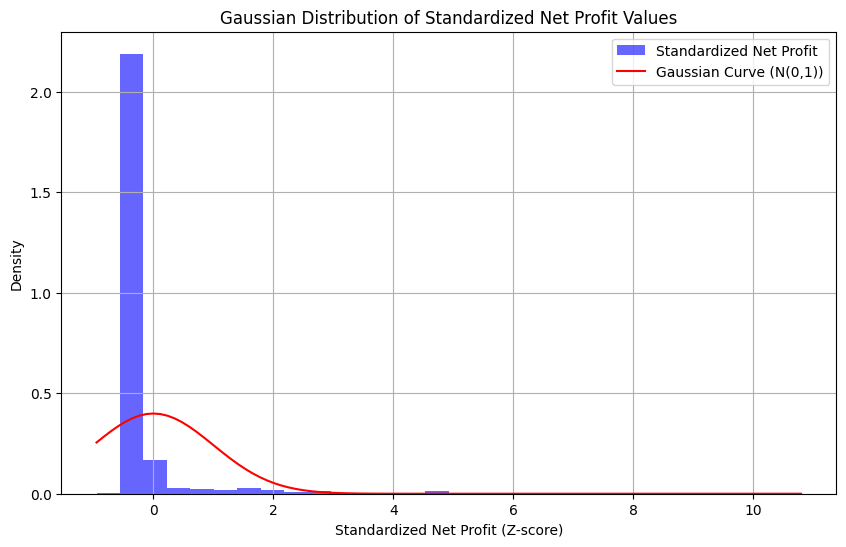

In [1]:
#Z-Score Gaussian 

import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load JSON data
file_path = "quarterly_data.json"  # Change this to the correct file path
with open(file_path, "r") as file:
    data = json.load(file)

# Extract Net Profit/(Loss) values for all companies
net_profit_data = data["Quarterly"].get("Net profit/(loss) for the period", {})

# Flatten values into a single list, ignoring missing values
net_profit_values = []
for company, values in net_profit_data.items():
    net_profit_values.extend([v for v in values if isinstance(v, (int, float))])  # Ignore non-numeric data

# Convert to numpy array for standardization
net_profit_values = np.array(net_profit_values)

# Standardize using Z-score
mean_profit = np.mean(net_profit_values)
std_profit = np.std(net_profit_values)
z_scores = (net_profit_values - mean_profit) / std_profit

# Plot histogram of standardized values
plt.figure(figsize=(10, 6))
plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='blue', label="Standardized Net Profit")

# Overlay Gaussian curve
x = np.linspace(min(z_scores), max(z_scores), 100)
gaussian_curve = stats.norm.pdf(x, 0, 1)  # Standard Normal Distribution
plt.plot(x, gaussian_curve, 'r', label="Gaussian Curve (N(0,1))")

# Labels and title
plt.xlabel("Standardized Net Profit (Z-score)")
plt.ylabel("Density")
plt.title("Gaussian Distribution of Standardized Net Profit Values")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


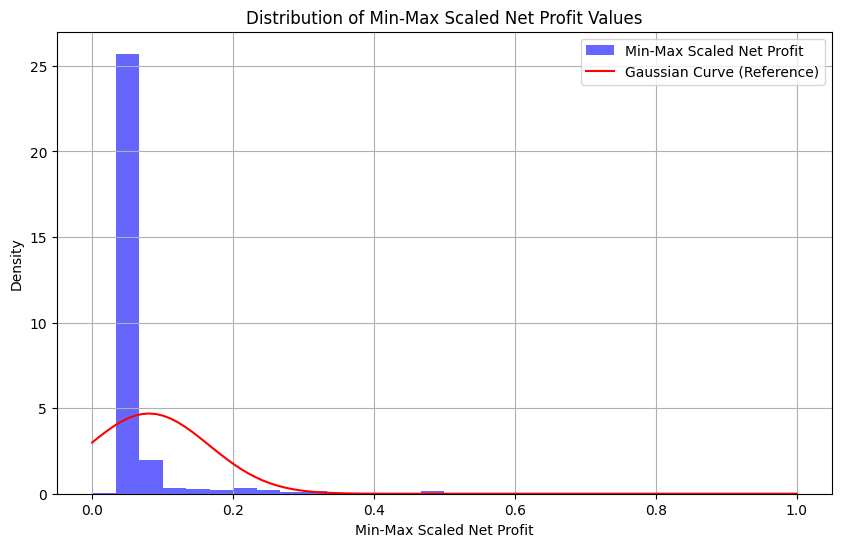

In [2]:
#Min-Max Gaussian

import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load JSON data
file_path = "quarterly_data.json"  # Change this to the correct file path
with open(file_path, "r") as file:
    data = json.load(file)

# Extract Net Profit/(Loss) values for all companies
net_profit_data = data["Quarterly"].get("Net profit/(loss) for the period", {})

# Flatten values into a single list, ignoring missing values
net_profit_values = []
for company, values in net_profit_data.items():
    net_profit_values.extend([v for v in values if isinstance(v, (int, float))])  # Ignore non-numeric data

# Convert to numpy array for scaling
net_profit_values = np.array(net_profit_values)

# Apply Min-Max Scaling
min_profit = np.min(net_profit_values)
max_profit = np.max(net_profit_values)
min_max_scaled = (net_profit_values - min_profit) / (max_profit - min_profit)

# Plot histogram of Min-Max Scaled values
plt.figure(figsize=(10, 6))
plt.hist(min_max_scaled, bins=30, density=True, alpha=0.6, color='blue', label="Min-Max Scaled Net Profit")

# Overlay Gaussian curve (for reference, although Min-Max doesn't assume normality)
x = np.linspace(min(min_max_scaled), max(min_max_scaled), 100)
gaussian_curve = stats.norm.pdf(x, np.mean(min_max_scaled), np.std(min_max_scaled))
plt.plot(x, gaussian_curve, 'r', label="Gaussian Curve (Reference)")

# Labels and title
plt.xlabel("Min-Max Scaled Net Profit")
plt.ylabel("Density")
plt.title("Distribution of Min-Max Scaled Net Profit Values")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


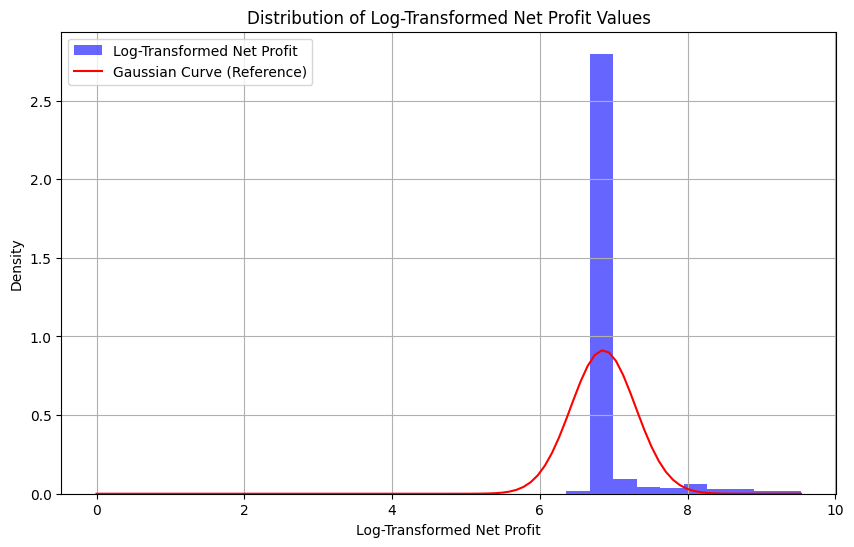

In [3]:
#Log Transformation

import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load JSON data
file_path = "quarterly_data.json"  # Change this to the correct file path
with open(file_path, "r") as file:
    data = json.load(file)

# Extract Net Profit/(Loss) values for all companies
net_profit_data = data["Quarterly"].get("Net profit/(loss) for the period", {})

# Flatten values into a single list, ignoring missing or non-numeric values
net_profit_values = []
for company, values in net_profit_data.items():
    net_profit_values.extend([v for v in values if isinstance(v, (int, float))])  

# Convert to numpy array
net_profit_values = np.array(net_profit_values)

# Apply log transformation (handle negative values separately)
shift = abs(min(net_profit_values)) + 1  # Shift to make all values positive
log_transformed = np.log(net_profit_values + shift)  # Apply log transformation

# Plot histogram of log-transformed values
plt.figure(figsize=(10, 6))
plt.hist(log_transformed, bins=30, density=True, alpha=0.6, color='blue', label="Log-Transformed Net Profit")

# Overlay Gaussian curve for reference
x = np.linspace(min(log_transformed), max(log_transformed), 100)
gaussian_curve = stats.norm.pdf(x, np.mean(log_transformed), np.std(log_transformed))  
plt.plot(x, gaussian_curve, 'r', label="Gaussian Curve (Reference)")

# Labels and title
plt.xlabel("Log-Transformed Net Profit")
plt.ylabel("Density")
plt.title("Distribution of Log-Transformed Net Profit Values")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load JSON data
file_path = "quarterly_data.json"
with open(file_path, "r") as file:
    data = json.load(file)

# Extract Net Profit/(Loss) values for all companies
net_profit_data = data["Quarterly"].get("Net profit/(loss) for the period", {})

# Create a directory to save the graphs
output_dir = "Company Gaussian Graph"
os.makedirs(output_dir, exist_ok=True)

# Process each company's net profit data
for company, values in net_profit_data.items():
    # Filter numeric values only
    net_profit_values = np.array([v for v in values if isinstance(v, (int, float))])
    
    if len(net_profit_values) > 1:  # Ensure at least 2 values to standardize
        # Standardize using Z-score
        mean_profit = np.mean(net_profit_values)
        std_profit = np.std(net_profit_values)
        z_scores = (net_profit_values - mean_profit) / std_profit
        
        # Plot histogram of standardized values
        plt.figure(figsize=(10, 6))
        plt.hist(z_scores, bins=30, density=True, alpha=0.6, color='blue', label="Standardized Net Profit")
        
        # Overlay Gaussian curve
        x = np.linspace(min(z_scores), max(z_scores), 100)
        gaussian_curve = stats.norm.pdf(x, 0, 1)  # Standard Normal Distribution
        plt.plot(x, gaussian_curve, 'r', label="Gaussian Curve (N(0,1))")
        
        # Labels and title
        plt.xlabel("Standardized Net Profit (Z-score)")
        plt.ylabel("Density")
        plt.title(f"Gaussian Distribution of {company}'s Standardized Net Profit")
        plt.legend()
        plt.grid(True)
        
        # Save the plot
        file_name = f"{company}_gaussian_graph_NP.png"
        plt.savefig(os.path.join(output_dir, file_name))
        plt.close()


In [3]:
%pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.8/39.5 MB 10.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.9/39.5 MB 10.2 MB/s eta 0:00:04
   ------ --------------------------------- 6.0/39.5 MB 10.2 MB/s eta 0:00:04
   -------- ------------------------------- 8.1/39.5 MB 10.2 MB/s eta 0:00:04
   ---------- ----------------------------- 10.0/39.5 MB 10.1 MB/s eta 0:00:03
   ----------- ---------------------------- 11.8/39.5 MB 9.8 MB/s eta 0:00:03
   ------------- -------------------------- 13.4/39.5 MB 9.5 MB/s eta 0:00:03
   --------------- ------------------------ 15.5/39.5 MB 9.6 MB/s eta 0:00:03
   ----------------- ---------------------- 17.6/39.5 MB 9.7 MB/s eta 0:00:03
   ------------------- -------------------- 19.7/39.5 MB 9.7 MB/s eta 0:00:03
   ---------------------- ----------------- 21.8/39.5 MB 9.8 MB/s eta 0:00:02
   ------------------------ --------------- 23.9/39.5 MB 9.8 MB/s eta 0

In [4]:
import os
import cv2
import shutil

# Directory containing saved graphs
output_dir = "Company Gaussian Graph"

# Function to calculate similarity between two images
def compare_images(img1, img2):
    hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

# Read all saved graphs
graph_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
processed = set()

# Compare graphs and categorize similar ones
for i in range(len(graph_files)):
    if graph_files[i] in processed:
        continue
    
    img1 = cv2.imread(os.path.join(output_dir, graph_files[i]), cv2.IMREAD_GRAYSCALE)
    similar_graphs = [graph_files[i]]
    
    for j in range(i + 1, len(graph_files)):
        img2 = cv2.imread(os.path.join(output_dir, graph_files[j]), cv2.IMREAD_GRAYSCALE)
        similarity = compare_images(img1, img2)
        
        if similarity > 0.9:  # Threshold for similarity
            similar_graphs.append(graph_files[j])
            processed.add(graph_files[j])
    
    if len(similar_graphs) > 1:
        folder_name = os.path.join(output_dir, f"Similar_Set_{i}")
        os.makedirs(folder_name, exist_ok=True)
        for graph in similar_graphs:
            shutil.move(os.path.join(output_dir, graph), os.path.join(folder_name, graph))


In [ ]:
# import os
# import cv2
# import numpy as np
# import shutil
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Directory containing saved graphs
# output_dir = "Company Gaussian Graph"

# # Function to extract features from Gaussian graphs
# def extract_gaussian_features(image_path):
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     height, width = img.shape
    
#     # Find peak height (max intensity value in image)
#     peak_height = np.max(img)
    
#     # Estimate width by finding the number of pixels with intensity > threshold
#     threshold = peak_height * 0.5  # Consider half-max width
#     width_pixels = np.sum(img > threshold)
    
#     return [peak_height, width_pixels]

# # Read all saved graphs
# graph_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
# features = []
# file_paths = []

# # Extract features from each graph
# for file in graph_files:
#     file_path = os.path.join(output_dir, file)
#     file_paths.append(file_path)
#     features.append(extract_gaussian_features(file_path))

# # Convert to NumPy array for clustering
# features = np.array(features)

# # Perform K-Means Clustering (3 categories: Small, Medium, Large Gaussian curves)
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# kmeans.fit(features)
# labels = kmeans.labels_

# # Create categorized folders and move files
# for i, file in enumerate(graph_files):
#     category_folder = os.path.join(output_dir, f"Gaussian_Category_{labels[i]}")
#     os.makedirs(category_folder, exist_ok=True)
#     shutil.move(os.path.join(output_dir, file), os.path.join(category_folder, file))

In [6]:
import os
import cv2
import numpy as np
import shutil
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Directory containing saved graphs
output_dir = "Company Gaussian Graph"

# Function to extract features from Gaussian graphs
def extract_gaussian_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = img.shape
    
    # Find peak height (max intensity value in image)
    peak_height = np.max(img)
    
    # Estimate width by finding the number of pixels with intensity > threshold
    threshold = peak_height * 0.5  # Consider half-max width
    width_pixels = np.sum(img > threshold)
    
    return [peak_height, width_pixels]

# Read all saved graphs
graph_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
features = []
file_paths = []

# Extract features from each graph
for file in graph_files:
    file_path = os.path.join(output_dir, file)
    file_paths.append(file_path)
    features.append(extract_gaussian_features(file_path))

# Convert to NumPy array for clustering
features = np.array(features)

# Perform K-Means Clustering (3 categories: Small, Medium, Large Gaussian curves)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(features)
labels = kmeans.labels_

# Create categorized folders and copy files
for i, file in enumerate(graph_files):
    category_folder = os.path.join(output_dir, f"Gaussian_Category_{labels[i]}")
    os.makedirs(category_folder, exist_ok=True)
    shutil.copy(os.path.join(output_dir, file), os.path.join(category_folder, file))
    
    # Create a text file inside each category folder explaining the classification criteria
    category_info = os.path.join(category_folder, "category_info.txt")
    with open(category_info, "w") as f:
        f.write(f"Category: Gaussian_Category_{labels[i]}\n")
        f.write(f"Classification based on:\n")
        f.write(f"- Peak Height (Max Intensity in Image)\n")
        f.write(f"- Width (Number of Pixels with >50% Peak Intensity)\n")
        f.write(f"Feature Values for this Category:\n")
        f.write(f"- Peak Height: {features[i][0]}\n")
        f.write(f"- Width: {features[i][1]}\n")
